In [2]:
import pandas as pd

crimes_data_pd = pd.read_csv('Crimes_-_2001_to_Present_20240414.csv')

crimes_data_pd['Date'] = pd.to_datetime(crimes_data_pd['Date'], format='%m/%d/%Y %I:%M:%S %p')

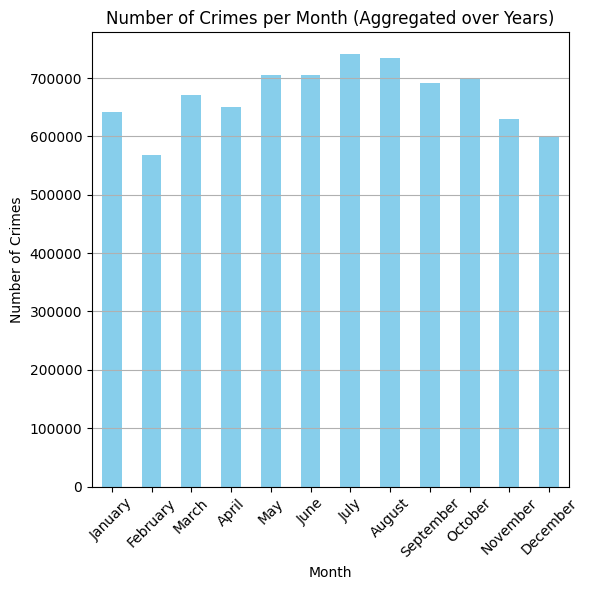

In [30]:
import matplotlib.pyplot as plt

crimes_data_pd['Month'] = crimes_data_pd['Date'].dt.month

crimes_per_month = crimes_data_pd.groupby('Month').size()


months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(6, 6))
crimes_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes per Month (Aggregated over Years)')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(range(12), months, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


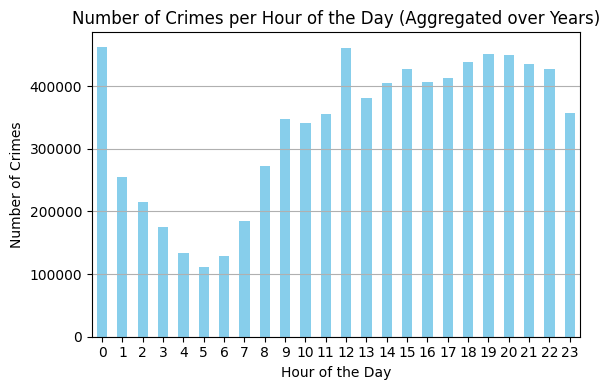

In [15]:
import matplotlib.pyplot as plt

crimes_data_pd['Hour'] = crimes_data_pd['Date'].dt.hour

crimes_per_hour = crimes_data_pd.groupby('Hour').size()

plt.figure(figsize=(6, 4))
crimes_per_hour.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


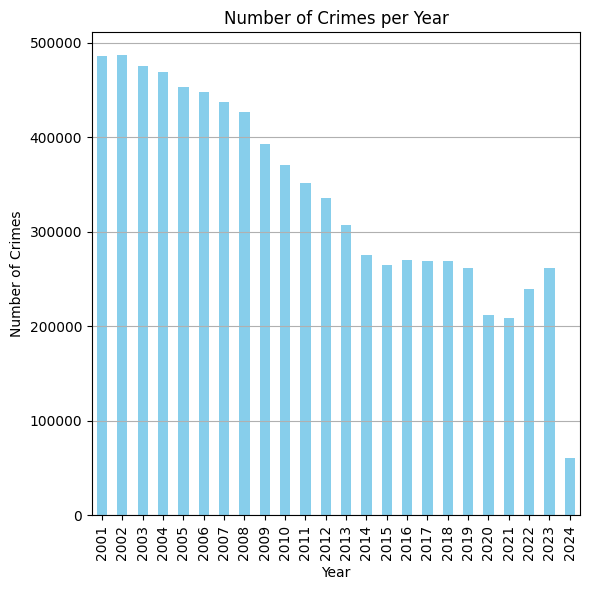

In [31]:
import matplotlib.pyplot as plt

crimes_data_pd['Year'] = crimes_data_pd['Date'].dt.year

crimes_per_year = crimes_data_pd.groupby('Year').size()

plt.figure(figsize=(6, 6))
crimes_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [1]:
import matplotlib.pyplot as plt

crimes_data_pd_type_counts = crimes_data_pd['Primary Type'].value_counts()

total_crimes = len(crimes_data_pd)

threshold = 0.01

insignificant_crime_types = crimes_data_pd_type_counts[crimes_data_pd_type_counts / total_crimes <= threshold]

other_offense_count = insignificant_crime_types.sum()
significant_crime_types = crimes_data_pd_type_counts[crimes_data_pd_type_counts / total_crimes > threshold]
significant_crime_types['OTHER OFFENSE'] = other_offense_count

plt.figure(figsize=(12, 6))
plt.pie(significant_crime_types, labels=significant_crime_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Crime Types Distribution (Percentage > 1% or Aggregated as "OTHER OFFENSE")')
plt.tight_layout()
plt.show()


NameError: name 'crimes_data_pd' is not defined

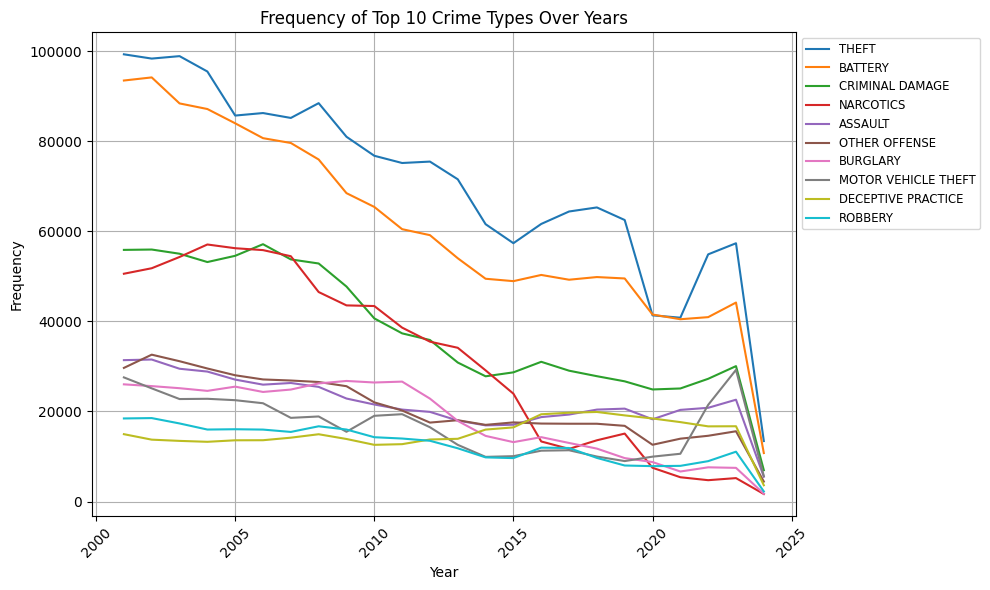

In [32]:
import matplotlib.pyplot as plt

crime_type_per_year = crimes_data_pd.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

top_10_types = crime_type_per_year.sum().nlargest(10).index
crime_type_per_year = crime_type_per_year[top_10_types]

plt.figure(figsize=(10, 6))
for col in crime_type_per_year.columns:
    plt.plot(crime_type_per_year.index, crime_type_per_year[col], label=col)

plt.title('Frequency of Top 10 Crime Types Over Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


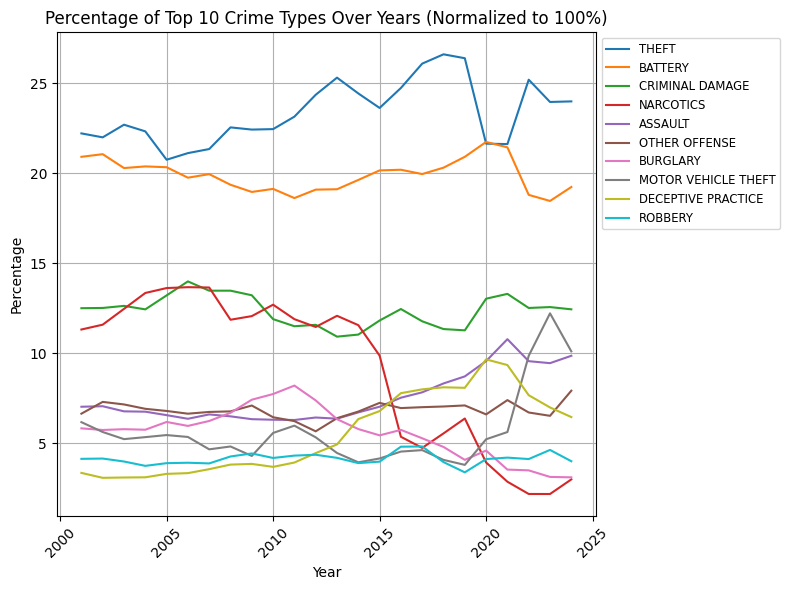

: 

In [39]:
import matplotlib.pyplot as plt

crime_type_per_year = crimes_data_pd.groupby(['Year', 'Primary Type']).size().unstack(fill_value=0)

top_10_types = crime_type_per_year.sum().nlargest(10).index
crime_type_per_year = crime_type_per_year[top_10_types]

crime_type_per_year_percent = crime_type_per_year.div(crime_type_per_year.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8, 6))
for col in crime_type_per_year_percent.columns:
    plt.plot(crime_type_per_year_percent.index, crime_type_per_year_percent[col], label=col)

plt.title('Percentage of Top 10 Crime Types Over Years (Normalized to 100%)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small') 
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
import folium
from folium.plugins import HeatMap
import math

filtered_data = crimes_data_pd.dropna(subset=["Latitude", "Longitude"])

filtered_data = filtered_data.iloc[::100]

top_5_types = filtered_data['Primary Type'].value_counts().head(10).index.tolist()

for crime_type in top_5_types:
    crime_type_data = filtered_data[filtered_data['Primary Type'] == crime_type]
    chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
    HeatMap(crime_type_data[["Latitude", "Longitude"]], radius=15).add_to(chicago_map)
    file_name = f"heatmap_html/crime_heatmap_{crime_type.replace(' ', '_')}.html"
    chicago_map.save(file_name)


In [ ]:
import folium
from folium.plugins import HeatMap
import math

chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=11)

filtered_data = crimes_data_pd.dropna(subset=["Latitude", "Longitude"])

filtered_data = filtered_data.iloc[::100]

HeatMap(filtered_data[["Latitude", "Longitude"]], radius=15).add_to(chicago_map)

chicago_map.save("crime_heatmap.html")
